# OrthoSAM examples

In [1]:
import json
import os
import sys
from utility import load_config,create_dir_ifnotexist, prompt_fid,load_image, plot_tiling_with_overlap

**This example will process an entire directory containing several files. The data were taken from SediNet https://github.com/DigitalGrainSize/SediNet, because they provide reasonable sized images that take about 2 minutes per image.**

If you would like to process only a few images, we suggest downloading:
https://github.com/DigitalGrainSize/SediNet/blob/master/images/5_6.JPG
https://github.com/DigitalGrainSize/SediNet/blob/master/images/4.JPG
https://github.com/DigitalGrainSize/SediNet/blob/master/images/8.JPG

and place them into `data/SediNet/images`.

In the first step, we set parameters and create the list of files. If you set `id=None`, all files in the directory listed in 'DatasetName' will be processed. If you only want to process a single image, you either give the filename or the number of the file in the field 'fid'.

In [8]:
id=0 # Filename or the index after sorting by file name. If not known input None and all files will be listed with the index.

#main_para defines the parameters for the first layer
#it also serve as a template for the later layers.
main_para={'OutDIR': f'Sedinet/sedinet_{id}_up2_org',# where output will be stored relative to the MainOutDIR stored in config.json
    'DatasetName': 'sedinet/SediNet/images',#where image is stored
    'fid': id, #Filename or the index after sorting by file name. If index not known use None and all files will be listed with the index.
    'resolution(mm)': 1, #image resolution in mm/pixel
    'tile_size': 1024,
    'tile_overlap':200,
    'resample_factor': 1, #'Auto': auto select resample rate.
    'input_point_per_axis': 30,
    'dilation_size':5,
    'stability_t':0.85,
    'expected_min_size(sqmm)': 500,
    'min_radius': 0,
    'Calculate_stats': True, # True: calculate statistics. 
    'Discord_notification': False,# True: send discord when finished. If you wish to use this feature, please create a file name DWH.txt in the code directory and set the webhook.
    'Plotting': True# True: plot the results
    }

#para_list defines the parameters for the later layers
#each dictionary corresponds to one layer.
#the first layer is defined in main_para.
#the second layer is defined in para_list[0] and so on.
#main_para serves as a template for the later layers.
#and in para_list specify the parameters for each layer that need to be updated.
para_list=[
    {'resample_factor':1/2, #None: use method A. 'Auto': auto select resample rate.
    }
    ]

#parameters for preprocessing. Only create this list if you want to use preprocessing.
#preprocessing is optional.
pre_para_list=[{#'Gaussian': {'kernel size':3},
                #'CLAHE':{'clip limit':2},
                #'Resample': {'fxy':4},
                #'Buffering': {'crop size': crop_size}
            },{},{}]

You can verify the parameters by looking at the dictonaries

In [9]:
main_para

{'OutDIR': 'Sedinet/sedinet_0_up2_org',
 'DatasetName': 'sedinet/SediNet/images',
 'fid': 0,
 'resolution(mm)': 1,
 'tile_size': 1024,
 'tile_overlap': 200,
 'resample_factor': 1,
 'input_point_per_axis': 30,
 'dilation_size': 5,
 'stability_t': 0.85,
 'expected_min_size(sqmm)': 500,
 'min_radius': 0,
 'Calculate_stats': True,
 'Discord_notification': False,
 'Plotting': True}

In [10]:
main_para['1st_resample_factor'] = main_para['resample_factor']
config = load_config()
main_para={**config,**main_para}
main_para['OutDIR'] = os.path.join(main_para.get('MainOutDIR'), main_para.get('OutDIR'))
if not os.path.exists(os.path.join(main_para.get('DataDIR'), main_para.get('DatasetName'))):
    print('Input directory does not exist. Exiting script.')
    sys.exit()

OutDIR=main_para.get('OutDIR')
create_dir_ifnotexist(OutDIR)
# if main_para.get('fid')==None:
#     main_para=prompt_fid(main_para)

['/DATA/vito/data/sedinet/SediNet/images/0017_cu_2.jpg', '/DATA/vito/data/sedinet/SediNet/images/0024_makro.JPG', '/DATA/vito/data/sedinet/SediNet/images/0026_makro.jpg', '/DATA/vito/data/sedinet/SediNet/images/0028_makro.JPG', '/DATA/vito/data/sedinet/SediNet/images/0029_1_Bali.JPG', '/DATA/vito/data/sedinet/SediNet/images/0041_cu_1.jpg', '/DATA/vito/data/sedinet/SediNet/images/0053_Makro.png', '/DATA/vito/data/sedinet/SediNet/images/0055_cu_2.jpg', '/DATA/vito/data/sedinet/SediNet/images/0062_cu_1.jpg', '/DATA/vito/data/sedinet/SediNet/images/0070_cu_1.jpg', '/DATA/vito/data/sedinet/SediNet/images/0079_cu_2.jpg', '/DATA/vito/data/sedinet/SediNet/images/0094_cu_1.jpg', '/DATA/vito/data/sedinet/SediNet/images/0095_cu_2.jpg', '/DATA/vito/data/sedinet/SediNet/images/0124_cu_1.jpg', '/DATA/vito/data/sedinet/SediNet/images/0132-makro.jpg', '/DATA/vito/data/sedinet/SediNet/images/0133_cu_2.jpg', '/DATA/vito/data/sedinet/SediNet/images/0151_cu_2.jpg', '/DATA/vito/data/sedinet/SediNet/images/

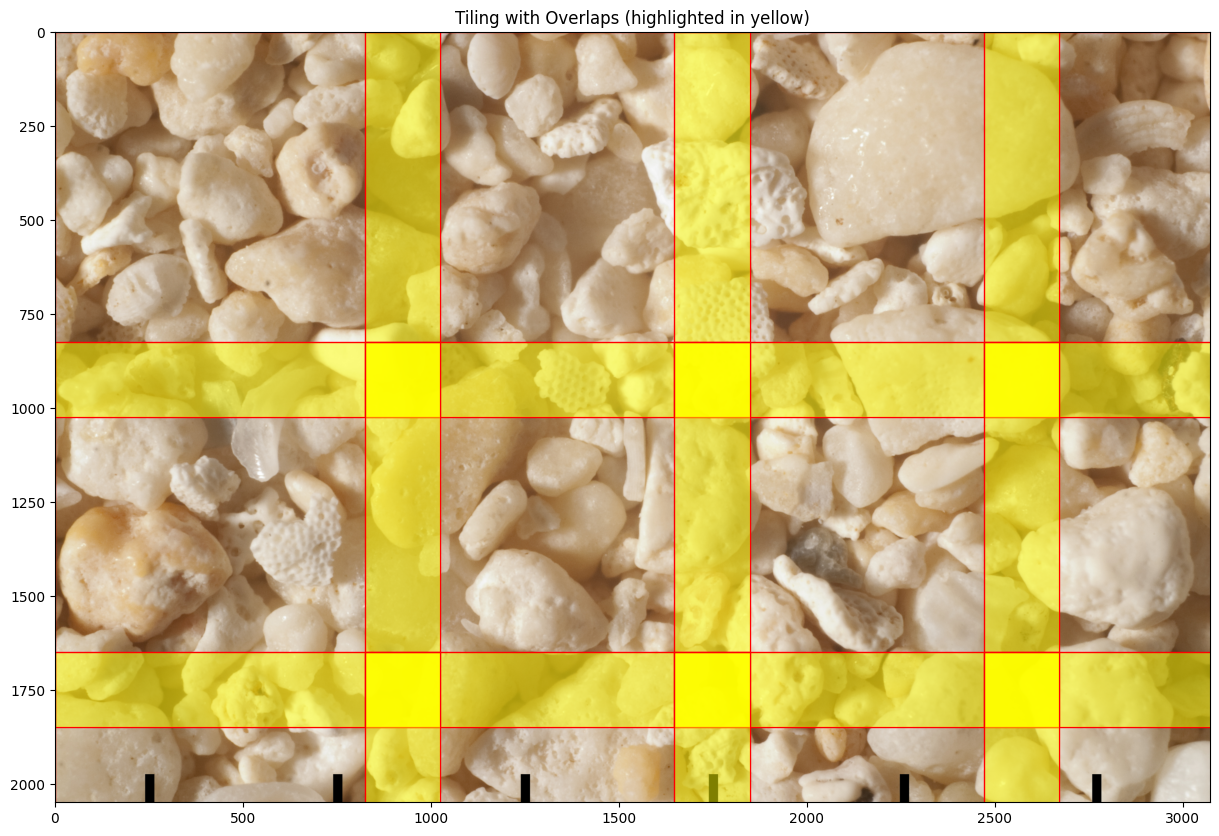

In [11]:
import matplotlib.pyplot as plt
DataDIR = main_para.get('DataDIR')
DSname = main_para.get('DatasetName')
fid = main_para.get('fid')
crop_size = main_para.get('tile_size')
overlap = main_para.get('tile_overlap')
image=load_image(DataDIR,DSname,fid)

plt.figure(figsize=(15,10))
plot_tiling_with_overlap(image, (crop_size,crop_size), overlap)

In [12]:
# Save init_para to a JSON file
para_list.insert(0, {})
pass_para_list = [dict(main_para, **para) for para in para_list]
with open(OutDIR+f'init_para.json', 'w') as json_file:
    json.dump(pass_para_list, json_file, indent=4)
with open(OutDIR+f'pre_para.json', 'w') as json_file:
    json.dump(pre_para_list, json_file, indent=4)

In [13]:
from OrthoSAM import orthosam
orthosam(pass_para_list)

2025-08-07 21:26:29,420 - INFO - ---------------
2025-08-07 21:26:29,421 - INFO - Layer 0
2025-08-07 21:26:29,422 - INFO - 	Segment tiles
2025-08-07 21:26:29,423 - INFO - 	Loaded parameters from json
2025-08-07 21:26:29,423 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/DATA/vito/MetaSAM', 'DataDIR': '/DATA/vito/data', 'BaseDIR': '/DATA/vito', 'MainOutDIR': '/DATA/vito/output', 'OutDIR': '/DATA/vito/output/Sedinet/sedinet_0_up2_org', 'DatasetName': 'sedinet/SediNet/images', 'fid': 0, 'resolution(mm)': 1, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 1, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 500, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 1}
2025-08-07 21:26:29,424 - INFO - 	Minimum expected size: 500.0 pixel
2025-08-07 21:26:29,458 - INFO - 	Loaded preprocessing parameters from json
2025-08-07 21:26:29,460 - INFO - {'Resample': {'fxy': 1}}
20

2025-08-07 21:26:29,556 - INFO - /DATA/vito/data/sedinet/SediNet/images/0017_cu_2.jpg imported
2025-08-07 21:26:29,556 - INFO - 	Image size:
2025-08-07 21:26:29,557 - INFO - (2048, 3072, 3)
2025-08-07 21:26:29,558 - INFO - Not resampling
2025-08-07 21:26:29,558 - INFO - 	Tiled into 12 tiles
2025-08-07 21:26:29,571 - INFO - Currently running on GPU
2025-08-07 21:26:29,572 - INFO - Model vit_h
2025-08-07 21:26:46,361 - ERROR - /DATA/vito/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
2025-08-07 21:26:46,361 - ERROR -   warnings.warn("Can't initialize NVML")
2025-08-07 21:26:46,810 - INFO - 	Segmenting tile: (0, 0) [1/12]
2025-08-07 21:26:52,911 - INFO - 	First pass SAM: 1842 mask(s) found
2025-08-07 21:26:53,324 - INFO - 	Filtered by highest predicted iou per seed point, 900 mask(s) remains
2025-08-07 21:27:26,644 - INFO - 	Threshold: 1000 pixels, 998989 groups removed
2025-08-07 21:27:26,644 - INFO - 
2025-08-07 21:27:26,644 - INFO - 	O

KeyboardInterrupt: 